In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('synthetic_fraud_dataset.csv')
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [4]:
df.describe()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [5]:
df.shape

(50000, 21)

In [6]:
df.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

In [7]:
df.isna().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Date'] = df['Timestamp'].dt.date

In [9]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Date
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,2023-08-14
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,2023-06-07
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,2023-06-20
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,2023-12-07
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,2023-11-11


In [10]:
df['Transaction_Type'] = df['Transaction_Type'].astype('category')
df['Device_Type'] = df['Device_Type'].astype('category')
df['Merchant_Category'] = df['Merchant_Category'].astype('category')
df['Card_Type'] = df['Card_Type'].astype('category')
df['Authentication_Method'] = df['Authentication_Method'].astype('category')

In [11]:
df.dtypes

Transaction_ID                          object
User_ID                                 object
Transaction_Amount                     float64
Transaction_Type                      category
Timestamp                       datetime64[ns]
Account_Balance                        float64
Device_Type                           category
Location                                object
Merchant_Category                     category
IP_Address_Flag                          int64
Previous_Fraudulent_Activity             int64
Daily_Transaction_Count                  int64
Avg_Transaction_Amount_7d              float64
Failed_Transaction_Count_7d              int64
Card_Type                             category
Card_Age                                 int64
Transaction_Distance                   float64
Authentication_Method                 category
Risk_Score                             float64
Is_Weekend                               int64
Fraud_Label                              int64
Date         

## Exploratory Data Analysis

<Axes: xlabel='Location'>

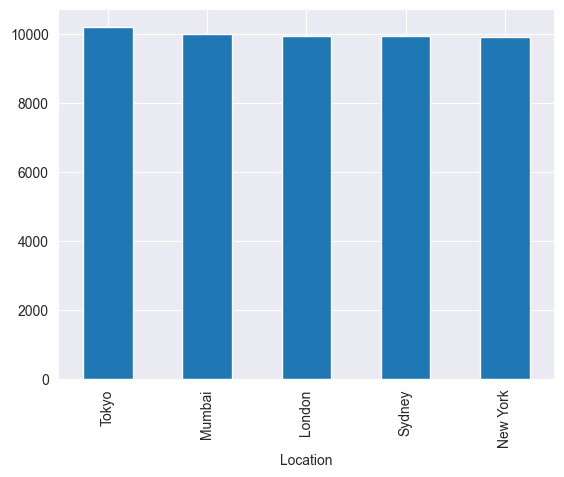

In [12]:
df['Location'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

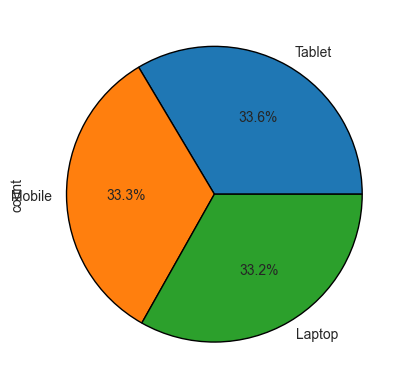

In [13]:
df['Device_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops={'linewidth':1, "edgecolor":'black'})

C:\Users\gpiska\AppData\Local\Temp\ipykernel_15952\3181268462.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df.groupby(['Transaction_Type', 'Device_Type'])['Transaction_Amount'].sum().unstack()


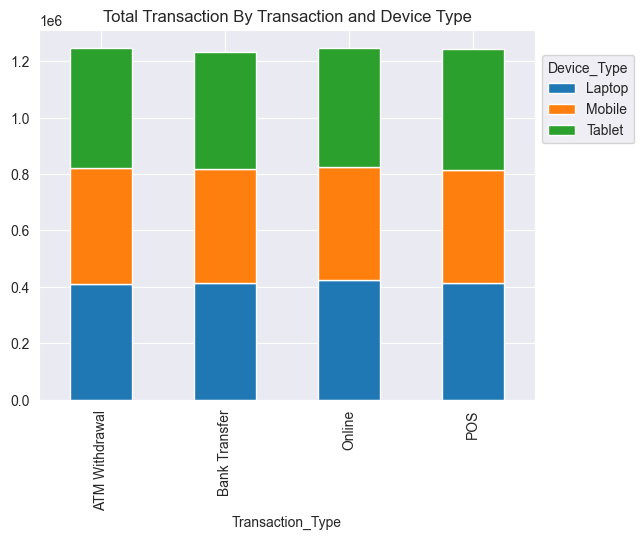

In [14]:
group = df.groupby(['Transaction_Type', 'Device_Type'])['Transaction_Amount'].sum().unstack()

group.plot(kind='bar', stacked=True)
plt.title('Total Transaction By Transaction and Device Type')
plt.legend(title='Device_Type', loc="upper left", bbox_to_anchor=(1, 0.95), ncol=1)
plt.show()

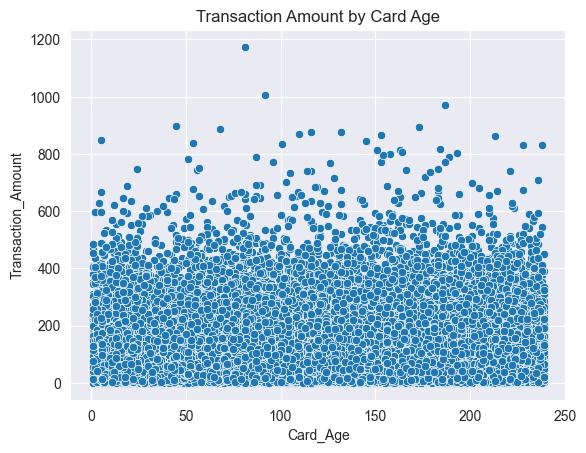

In [15]:
sns.scatterplot(x='Card_Age', y='Transaction_Amount', data=df)
plt.title('Transaction Amount by Card Age')
plt.show()

In [16]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Date
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,2023-08-14
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,2023-06-07
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,2023-06-20
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,2023-12-07
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,2023-11-11


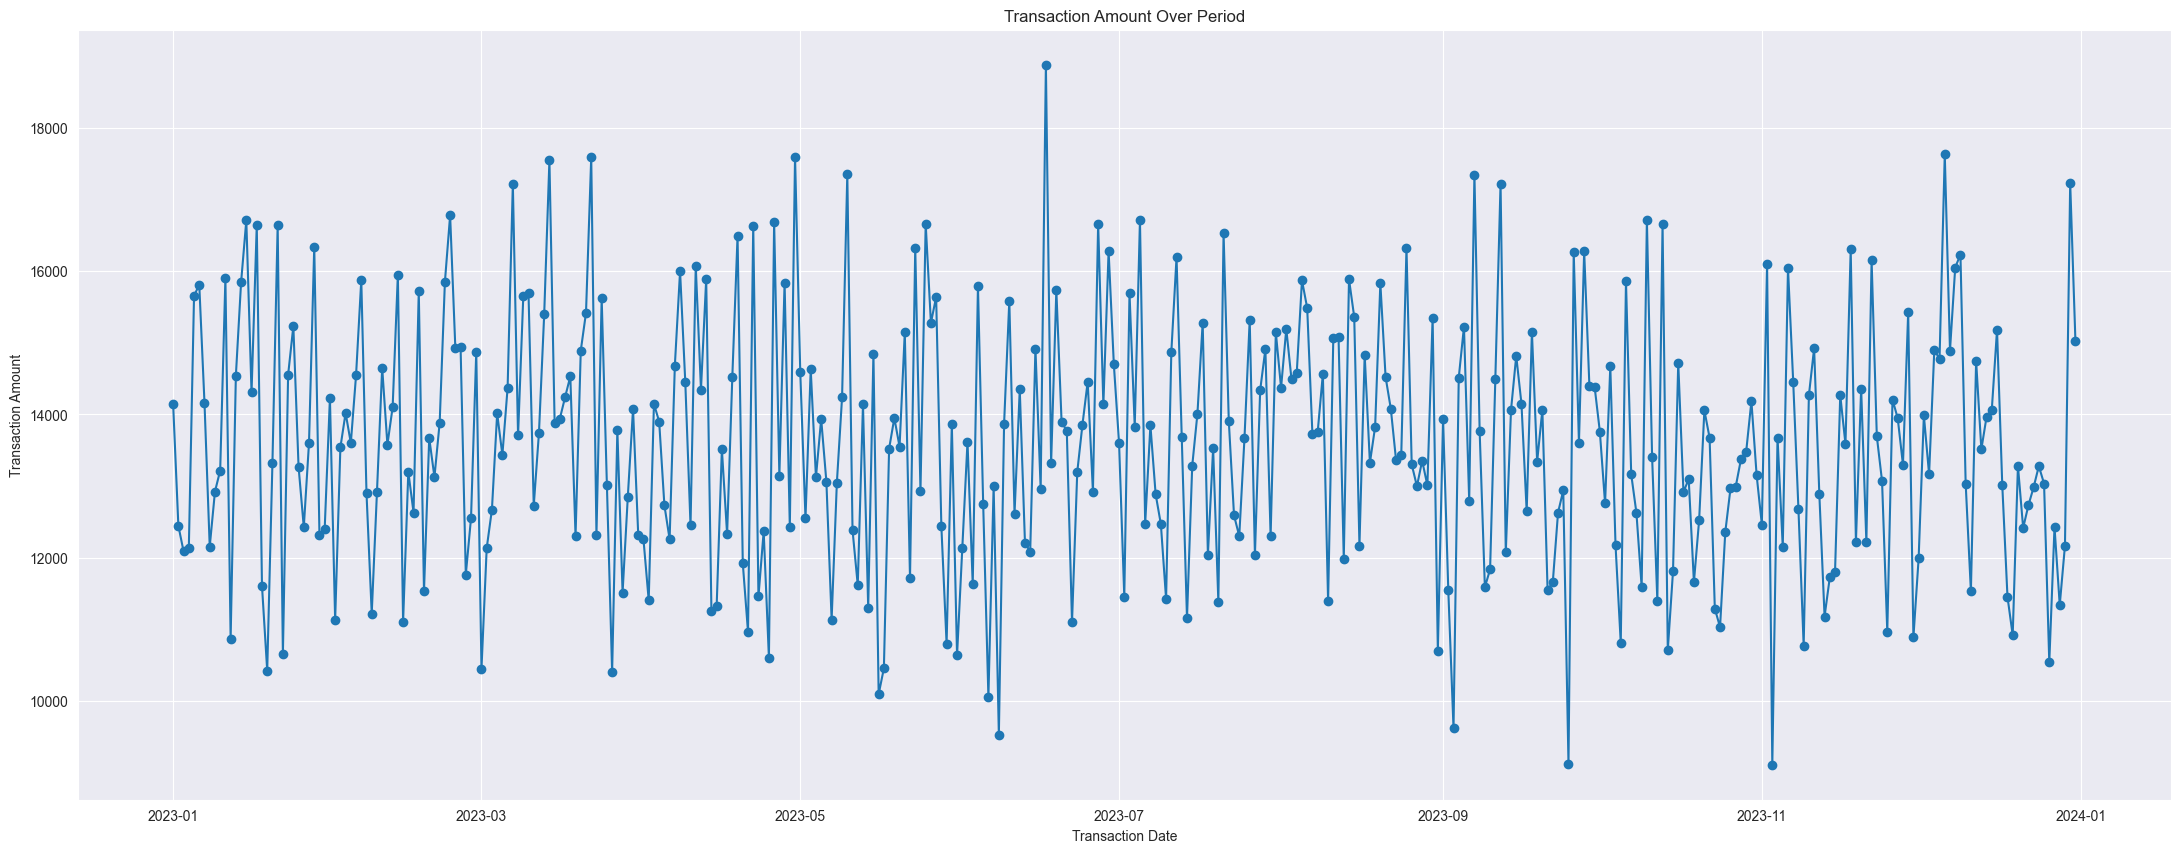

In [17]:
grp1 = df.groupby('Date')['Transaction_Amount'].sum()

plt.figure(figsize=(27, 10)) 
plt.plot(grp1, marker='o', linestyle='-')
plt.title('Transaction Amount Over Period')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.show()

C:\Users\gpiska\AppData\Local\Temp\ipykernel_15952\1072094536.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(values='Failed_Transaction_Count_7d', index='Location', columns='Device_Type', aggfunc='sum')


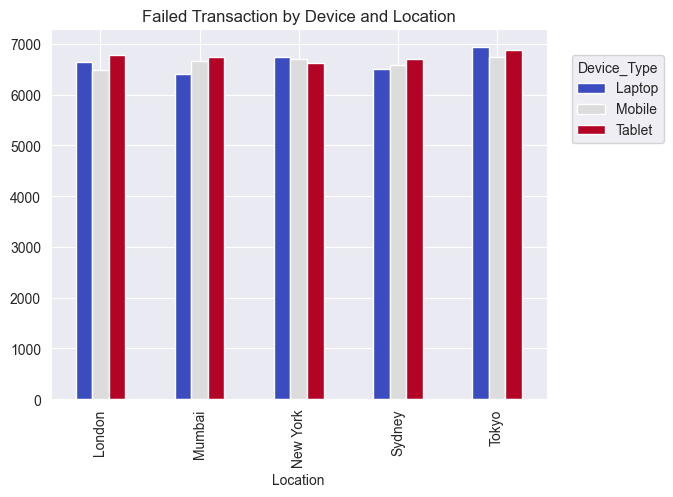

In [18]:
pivot_df = df.pivot_table(values='Failed_Transaction_Count_7d', index='Location', columns='Device_Type', aggfunc='sum')

pivot_df.plot(kind="bar", colormap='coolwarm')
plt.title('Failed Transaction by Device and Location')
plt.legend(title='Device_Type', loc='upper right', bbox_to_anchor=(1.25, 0.95), ncol=1)
plt.show()

## Data Encoding

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [20]:
## Encoding

le = LabelEncoder()

df['Transaction_Type'] = le.fit_transform(df['Transaction_Type'])
df['Device_Type'] = le.fit_transform(df['Device_Type'])
df['Merchant_Category'] = le.fit_transform(df['Merchant_Category'])
df['Card_Type'] = le.fit_transform(df['Card_Type'])
df['Authentication_Method'] = le.fit_transform(df['Authentication_Method'])

In [21]:
X = df[['Transaction_Amount', 'Transaction_Type',
        'Account_Balance', 'Device_Type',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend']]

y= df['Fraud_Label']

In [22]:
# Train_Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistics Regression

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train, y_train)

C:\Users\gpiska\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = lr.predict(X_test)

In [26]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}, "
        f"Precision: {precision_score(y_test, y_pred):.2f}, "
        f"Recall: {recall_score(y_test, y_pred):.2f}, "
        f"F1-Score: {f1_score(y_test, y_pred):.2f}")

Accuracy: 0.74, Precision: 0.64, Recall: 0.42, F1-Score: 0.51


## Random Forest

In [27]:
rfc = RandomForestClassifier()

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
r_pred = rfc.predict(X_test)

In [30]:
print(f"Accuracy: {accuracy_score(y_test, r_pred):.2f}, "
        f"Precision: {precision_score(y_test, r_pred):.2f}, "
        f"Recall: {recall_score(y_test, r_pred):.2f}, "
        f"F1-Score: {f1_score(y_test, r_pred):.2f}")

Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00


## XGBoost

In [31]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [32]:
xgb.fit(X_train, y_train)

C:\Users\gpiska\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:54:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
x_pred = xgb.predict(X_test)

In [34]:
print(f"Accuracy: {accuracy_score(y_test, x_pred):.2f}, "
        f"Precision: {precision_score(y_test, x_pred):.2f}, "
        f"Recall: {recall_score(y_test, x_pred):.2f}, "
        f"F1-Score: {f1_score(y_test, x_pred):.2f}")

Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00


**Conclusion: According to accuracy of above models Random Forest, XGBoost gives 100% accuracy in prediction**